## Required Libraries

In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, rand_score
from sklearn.metrics.pairwise import cosine_similarity

np.set_printoptions(precision=3)

# Question 1
In this exercise, you will perform k-means clustering on the seed data at the 
following link: 
<https://archive.ics.uci.edu/ml/datasets/seeds>

You will perform clustering using the following values of k: 2,3, 4, and 5. In each 
case you will determine the SSE value and calculate the value of Rand index and 
tabulate your results.

In [3]:
columns = ["Area", "Perrimeter", "Compactness", "Kernel Length", "Kernel Width", "Asymmetry Coefficient", "Kernel Groove Length", "Variant"]
data = pd.read_csv("seeds_dataset.txt", delim_whitespace=True, names=columns)  
X = data.to_numpy()[:,:-1]
Y = data.to_numpy()[:,-1]

data.describe()

,Area,Perrimeter,Compactness,Kernel Length,Kernel Width,Asymmetry Coefficient,Kernel Groove Length,Variant
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [4]:
for k in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    predicted = kmeans.predict(X)
    sse = mean_squared_error(Y, predicted)
    rand = rand_score(Y, predicted)
    print(f"KMeans clustering for K={k}:\n\tSSE = {sse}\n\tRand index = {rand}")

KMeans clustering for K=2:
	SSE = 3.6095238095238096
	Rand index = 0.7309637730690363
KMeans clustering for K=3:
	SSE = 2.738095238095238
	Rand index = 0.8743677375256322
KMeans clustering for K=4:
	SSE = 2.361904761904762
	Rand index = 0.8359990886306676
KMeans clustering for K=5:
	SSE = 2.1952380952380954
	Rand index = 0.8062884483937115


# Question 2
In this exercise, you will build a linear predictive model to predict crime rate 
based on a number of factors. The data is in the “crime-rate” file. You will build 
the model by writing your own script for gradient search. Experiment with 2-3 
learning rates to see the effect of learning rate on the search.

Alpha: 1e-06


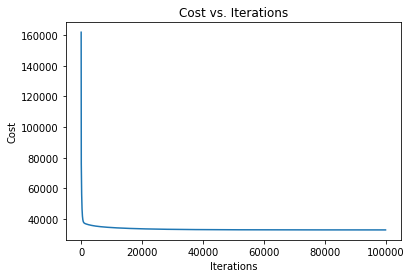

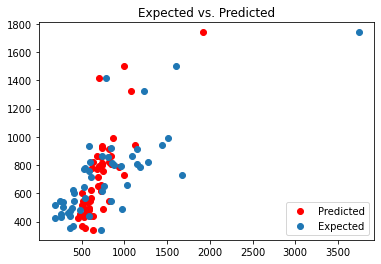

Beta: [ 0.335  3.884  2.8    9.765  2.95  -2.827]
Alpha: 2.5e-06


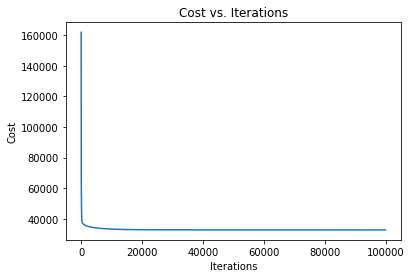

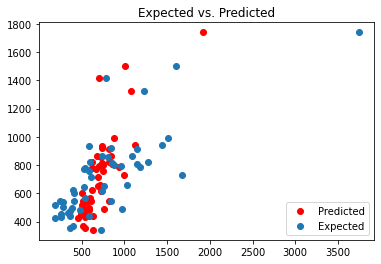

Beta: [ 0.335  3.937  3.007  9.635  3.153 -4.145]


In [5]:
data = pd.read_csv("CrimeRate.csv")
X = data.to_numpy().astype(np.float64)[:,1:7]
Y = data.to_numpy().astype(np.float64)[:,0]
rates = [0.000001, 0.0000025]
epochs = 100000

beta = np.ones(6)
expected = np.dot(X, beta)

def gradientDescent(X, Y, beta, rate, m=50):
    cost = []
    for _ in range (epochs):
        predicted = np.dot(X, beta)
        loss = predicted - Y
        mse = np.sum(loss ** 2) / m
        cost.append(mse)
        gradient = np.dot(X.T, loss) / m
        beta = beta - (rate * gradient)
    return beta, cost

for alpha in rates:
    beta_, cost = gradientDescent(X, Y, beta, alpha)

    print(f"Alpha: {alpha}")
    plt.plot(range(epochs), cost)
    plt.title("Cost vs. Iterations")
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.show()

    y = np.dot(X, beta_)

    plt.scatter(y, Y, color="red", label="Predicted")
    plt.scatter(expected, Y, label="Expected")
    plt.legend(loc="lower right")
    plt.title("Expected vs. Predicted")
    plt.show()

    print("Beta: " + str(beta_))


# Question 3
A transaction database is given below. Using the A-priori algorithm, determine 
all frequent item-sets with minimum support of 30%. **Show results at each step 
of the algorithm.**

| TID# | Items Bought | 
| --- | --- |
|1|A, B, D, E|
|2|B, C, D|
|3|A, B, D, E|
|4|A, C, D, E|
|5|B, C, D, E|
|6|B, D, E|
|7|C, D|
|8|A, B, C|
|9|A, D, E|
|10|B, D|

In [6]:
data = pd.read_csv("TransactionDatabase.csv")
print(data)

C1 = {}
for letter in data.columns:
    C1[letter] = np.sum(data[letter])

Lvalue = len(data) * 0.3
L1 = {x:y for x, y in C1.items() if y >= Lvalue}
print("L1: ", L1)

def occurrences(items):
    count = 0

    for i in range(len(data)):
        hasOccurrence = True
        for letter in items:
            if data.iloc[i][letter] == 0:
                hasOccurrence = False

        if hasOccurrence:
            count += 1

    return count

def printL(L):
    for x, y in L.items():
        print("\t(" + ", ".join(x) + "): " + str(y))

C2 = set([frozenset([x, y]) for x in C1 for y in C1 if x != y])
L2 = {x:occurrences(x) for x in C2 if occurrences(x) >= 3}
print("L2:")
printL(L2)

C3 = set([frozenset([x, y, z]) for x in C1 for y in C1 for z in C1 if x != y and x != z and y != z])
L3 = {x:occurrences(x) for x in C3 if occurrences(x) >= 3}
print("L3:")
printL(L3)

print("No elements in L4")

   A  B  C  D  E
0  1  1  0  1  1
1  0  1  1  1  0
2  1  1  0  1  1
3  1  0  1  1  1
4  0  1  1  1  1
5  0  1  0  1  1
6  0  0  1  1  0
7  1  1  1  0  0
8  1  0  0  1  1
9  0  1  0  1  0
L1:  {'A': 5, 'B': 7, 'C': 5, 'D': 9, 'E': 6}
L2:
	(E, B): 4
	(E, D): 6
	(E, A): 4
	(C, B): 3
	(D, A): 4
	(A, B): 3
	(C, D): 4
	(D, B): 6
L3:
	(E, D, A): 4
	(E, D, B): 4
No elements in L4


# Question 4
Consider the following simple IR situation. We have five keywords and six 
documents. The term-document matrix is given by the following matrix F.

|  | D1 | D2 | D3 | D4 | D5 | D6 |
| --- | --- | --- | --- | --- | --- | --- |
| K1 |1|0|1|0|0|0|
| K2 |0|1|0|0|0|0|
| K3 |1|1|0|0|0|0|
| K4 |1|0|0|1|1|0|
| K5 |0|0|0|1|0|1|

1. Obtain the singular value decomposition of F.  
2. Reconstruct F using only the top two singular values. 
3. Show the representation of the documents and the keywords in the 2-D space 
after SVD application. 
4. Using the cosine similarity measure in the LSI space, calculate the document 
similarity matrix. 

In [7]:
F = np.array([
    [1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0],
    [1, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 0, 1]
])

u, s, v = np.linalg.svd(F)
print(f"1.\nU:\n{u}\nS:{s}\nV:\n{v}")


1.
U:
[[ 4.403e-01 -2.962e-01 -5.695e-01  5.774e-01 -2.464e-01]
 [ 1.293e-01 -3.315e-01  5.870e-01  7.216e-16 -7.272e-01]
 [ 4.755e-01 -5.111e-01  3.677e-01  4.978e-16  6.144e-01]
 [ 7.030e-01  3.506e-01 -1.549e-01 -5.774e-01 -1.598e-01]
 [ 2.627e-01  6.467e-01  4.146e-01  5.774e-01  8.661e-02]]
S:[2.163 1.594 1.275 1.    0.394]
V:
[[ 7.486e-01  2.797e-01  2.036e-01  4.466e-01  3.251e-01  1.215e-01]
 [-2.865e-01 -5.285e-01 -1.858e-01  6.255e-01  2.199e-01  4.056e-01]
 [-2.797e-01  7.486e-01 -4.466e-01  2.036e-01 -1.215e-01  3.251e-01]
 [-4.718e-16  1.017e-15  5.774e-01  2.163e-16 -5.774e-01  5.774e-01]
 [ 5.285e-01 -2.865e-01 -6.255e-01 -1.858e-01 -4.056e-01  2.199e-01]
 [-3.578e-17 -9.252e-18  3.578e-17 -5.774e-01  5.774e-01  5.774e-01]]


In [8]:
sigma = np.zeros((5, 6))

for i in range(2):
    sigma[i, i] = s[i]

reconstructed = np.round(np.dot(u, np.dot(sigma, v)))
print(f"2. Reconstructed F:\n{reconstructed}")

2. Reconstructed F:
[[ 1.  1.  0.  0.  0. -0.]
 [ 0.  0.  0. -0. -0. -0.]
 [ 1.  1.  0. -0.  0. -0.]
 [ 1.  0.  0.  1.  1.  0.]
 [ 0. -0. -0.  1.  0.  0.]]


In [13]:
u2 = np.array([u[:, 0]*s[0], u[:, 1]*s[1]]).T
v2 = np.array([v[:, 0]*s[0], v[:, 1]*s[1]]).T

print("3.")
print("Terms:\n", u2)
print("Documents:\n", v2)

3.
Terms:
 [[ 0.952 -0.472]
 [ 0.28  -0.528]
 [ 1.028 -0.815]
 [ 1.52   0.559]
 [ 0.568  1.031]]
Documents:
 [[ 1.619e+00  4.460e-01]
 [-6.195e-01 -8.426e-01]
 [-6.049e-01  1.194e+00]
 [-1.020e-15  1.622e-15]
 [ 1.143e+00 -4.567e-01]
 [-7.738e-17 -1.475e-17]]


In [19]:
print("4.\n", cosine_similarity(F))

4.
 [[1.    0.    0.5   0.408 0.   ]
 [0.    1.    0.707 0.    0.   ]
 [0.5   0.707 1.    0.408 0.   ]
 [0.408 0.    0.408 1.    0.408]
 [0.    0.    0.    0.408 1.   ]]
